In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
from datasets import load_dataset

dataset = load_dataset("gigaword")

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
train_dataset = dataset['train'][:2500]
validation_dataset = dataset['validation'][:600]
test_dataset = dataset['test'][:600]

In [ ]:
Data = pd.DataFrame(train_dataset)

In [ ]:
Data1 = pd.DataFrame(validation_dataset)
Data1.shape

(600, 2)

In [ ]:
df=Data[Data['document'].isnull()==False]
df=Data[Data['summary'].isnull()==False]

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
stop_words = set(stopwords.words('english'))
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:
            long_words.append(i)
    return (" ".join(long_words)).strip()

In [ ]:
x_train = []
for t in df['document']:
    x_train.append(text_cleaner(t))

y_train = []
for t in df['summary']:
    y_train.append(text_cleaner(t))

In [ ]:
sequence_lengths = [len(seq) for seq in y_train]
print(max(sequence_lengths))

66


In [ ]:
pd.set_option('display.max_colwidth', None)
preprocessed_data = pd.DataFrame({
    'Cleaned Document': x_train,
    'Cleaned Summary': y_train
})

print(preprocessed_data.head())

                                                                                                                                                  Cleaned Document  \
0         australia current account deficit shrunk record billion dollars lrb billion rrb june quarter due soaring commodity prices figures released monday showed   
1                                                least two people killed suspected bomb attack passenger bus strife torn southern philippines monday military said   
2                                                    australian shares closed percent monday following weak lead united states lower commodity prices dealers said   
3                           south korea nuclear envoy kim sook urged north korea monday restart work disable nuclear plants stop typical brinkmanship negotiations   
4  south korea monday announced sweeping tax reforms including income corporate tax cuts boost growth stimulating sluggish private consumption business investment   

   

In [ ]:

preprocessed_data['Cleaned Document'] = preprocessed_data['Cleaned Document'].str.replace("lrb", "", regex=False).str.replace("rrb", "", regex=False)
preprocessed_data['Cleaned Summary'] = preprocessed_data['Cleaned Summary'].str.replace("lrb", "", regex=False).str.replace("rrb", "", regex=False)


print(preprocessed_data.head())

                                                                                                                                                  Cleaned Document  \
0               australia current account deficit shrunk record billion dollars  billion  june quarter due soaring commodity prices figures released monday showed   
1                                                least two people killed suspected bomb attack passenger bus strife torn southern philippines monday military said   
2                                                    australian shares closed percent monday following weak lead united states lower commodity prices dealers said   
3                           south korea nuclear envoy kim sook urged north korea monday restart work disable nuclear plants stop typical brinkmanship negotiations   
4  south korea monday announced sweeping tax reforms including income corporate tax cuts boost growth stimulating sluggish private consumption business investment   

   

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW, get_linear_schedule_with_warmup

In [ ]:
# Adding 'summarize: ' prefix for t5 small model to work
preprocessed_data['Cleaned Document'] = 'summarize: ' + preprocessed_data['Cleaned Document']

train_texts = preprocessed_data['Cleaned Document'][:5000].tolist()
train_labels = preprocessed_data['Cleaned Summary'][:5000].tolist()
val_texts = preprocessed_data['Cleaned Document'][500:].tolist()
val_labels = preprocessed_data['Cleaned Summary'][500:].tolist()

val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=0.5, random_state=42)

In [ ]:
print(preprocessed_data.head())

                                                                                                                                                             Cleaned Document  \
0               summarize: australia current account deficit shrunk record billion dollars  billion  june quarter due soaring commodity prices figures released monday showed   
1                                                summarize: least two people killed suspected bomb attack passenger bus strife torn southern philippines monday military said   
2                                                    summarize: australian shares closed percent monday following weak lead united states lower commodity prices dealers said   
3                           summarize: south korea nuclear envoy kim sook urged north korea monday restart work disable nuclear plants stop typical brinkmanship negotiations   
4  summarize: south korea monday announced sweeping tax reforms including income corporate tax cuts boost growth st

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)
train_labels_encodings = tokenizer(train_labels, truncation=True, padding=True, max_length=128)
val_labels_encodings = tokenizer(val_labels, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)
test_labels_encodings = tokenizer(test_labels, truncation=True, padding=True, max_length=128)

class SummarizationDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels['input_ids'][idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

train_dataset = SummarizationDataset(train_encodings, train_labels_encodings)
val_dataset = SummarizationDataset(val_encodings, val_labels_encodings)
test_dataset = SummarizationDataset(test_encodings, test_labels_encodings)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training hyperparameters
epochs = 10
batch_size = 8
learning_rate = 3e-5

optimizer = AdamW(model.parameters(), lr=learning_rate)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataset) * epochs)

In [ ]:
train_losses = []
val_losses = []

model.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in torch.utils.data.DataLoader(train_dataset, batch_size=batch_size):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_dataset)
    train_losses.append(avg_loss)
    print(f"Epoch: {epoch}, Training Loss: {avg_loss}")


Epoch: 0, Training Loss: 0.32912190933227536
Epoch: 1, Training Loss: 0.16274981226921081
Epoch: 2, Training Loss: 0.14437894299030304
Epoch: 3, Training Loss: 0.13592680416107178
Epoch: 4, Training Loss: 0.13006603968143463
Epoch: 5, Training Loss: 0.12508917961120605
Epoch: 6, Training Loss: 0.12144730406999588
Epoch: 7, Training Loss: 0.11790390024185181
Epoch: 8, Training Loss: 0.11395714197158814
Epoch: 9, Training Loss: 0.11103501843214035


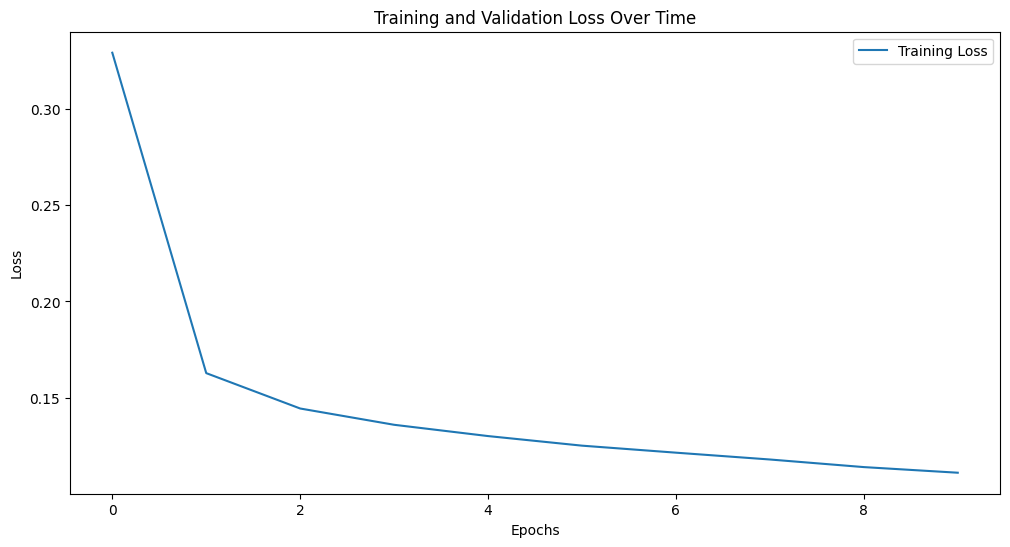

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

In [ ]:
total_val_loss = 0
model.eval()

with torch.no_grad():
    for batch in torch.utils.data.DataLoader(val_dataset, batch_size=batch_size):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_val_loss += loss.item()

avg_val_loss = total_val_loss / len(val_dataset)
print(f"Average Validation Loss: {avg_val_loss}")

Average Validation Loss: 0.08933560135960579


In [ ]:
from datasets import load_metric

rouge = load_metric('rouge')

model.eval()
with torch.no_grad():
    for batch in torch.utils.data.DataLoader(val_dataset, batch_size=batch_size):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

        rouge.add_batch(predictions=decoded_preds, references=decoded_labels)

result = rouge.compute()
print(result)


{'rouge1': AggregateScore(low=Score(precision=0.48313329455266996, recall=0.48240769841269904, fmeasure=0.47664001402450507), mid=Score(precision=0.4983057178932184, recall=0.49759722222222313, fmeasure=0.49106154371944066), high=Score(precision=0.5149908071789325, recall=0.5141642361111114, fmeasure=0.5075546265784883)), 'rouge2': AggregateScore(low=Score(precision=0.23380614177489142, recall=0.23339415674603123, fmeasure=0.22929503425882716), mid=Score(precision=0.25133674242424187, recall=0.2505109126984122, fmeasure=0.24667560623501072), high=Score(precision=0.26884480519480497, recall=0.2671409226190472, fmeasure=0.2632622872908826)), 'rougeL': AggregateScore(low=Score(precision=0.455512454004329, recall=0.4556212896825396, fmeasure=0.44921227813616693), mid=Score(precision=0.4709628427128426, recall=0.47088849206349226, fmeasure=0.46421877929432276), high=Score(precision=0.4864417586580084, recall=0.48674541666666704, fmeasure=0.4792511087491388)), 'rougeLsum': AggregateScore(low

In [ ]:
model.eval()
test_rouge_scores = []

with torch.no_grad():
    for batch in torch.utils.data.DataLoader(test_dataset, batch_size=batch_size):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(batch['labels'], skip_special_tokens=True)

        rouge.add_batch(predictions=decoded_preds, references=decoded_labels)

test_result = rouge.compute()
print(test_result)


{'rouge1': AggregateScore(low=Score(precision=0.47552579545454576, recall=0.4723867261904766, fmeasure=0.4675977148260252), mid=Score(precision=0.4921273448773453, recall=0.48824642857142864, fmeasure=0.48302561616230555), high=Score(precision=0.5079705573593073, recall=0.5035990575396831, fmeasure=0.49779783072062295)), 'rouge2': AggregateScore(low=Score(precision=0.22634963203463157, recall=0.22138684523809507, fmeasure=0.219735194291003), mid=Score(precision=0.24329134199134161, recall=0.238478571428571, fmeasure=0.23639123319490996), high=Score(precision=0.261451549422799, recall=0.25497532738095197, fmeasure=0.2534230708139902)), 'rougeL': AggregateScore(low=Score(precision=0.45206077741702705, recall=0.4471974404761906, fmeasure=0.443104827620996), mid=Score(precision=0.4680159271284267, recall=0.46396011904761914, fmeasure=0.459163664577598), high=Score(precision=0.48465944985569964, recall=0.4797308432539684, fmeasure=0.47480560787252124)), 'rougeLsum': AggregateScore(low=Score

In [ ]:
model.eval()
with torch.no_grad():

    for i, batch in enumerate(torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=50)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
        decoded_texts = tokenizer.batch_decode(input_ids, skip_special_tokens=True)

        for text, pred, label in zip(decoded_texts, decoded_preds, decoded_labels):
            print(f"Input Text: {text}\n")
            print(f"Generated Summary: {pred}\n")
            print(f"Actual Summary: {label}\n")
            print("--------------------------------------------------\n")

        if i == 2:
            break

Input Text: summarize: army awarded million dollars unk contracts build joint military bases bulgaria embassy said statement thursday

Generated Summary: unk contracts build bulgaria bases

Actual Summary: army builds bulgarian base

--------------------------------------------------

Input Text: summarize: prominent militant group oil rich southern nigeria sunday said declared oil war threatened international industry vessels approach region

Generated Summary: militant group declares war oil industry

Actual Summary: militant group niger delta declares war oil industry

--------------------------------------------------

Input Text: summarize: defense secretary robert gates arrived london wednesday ahead meeting nato colleagues set overshadowed georgia conflict russia

Generated Summary: gates arrives london meeting nato

Actual Summary: gates arrives london ahead nato meeting

--------------------------------------------------

Input Text: summarize: dell expects softening global de

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
  train_encodings = tokenizer(x_train, truncation=True, padding=True, max_length=512)
  train_labels = tokenizer(y_train, truncation=True, padding=True, max_length=128)

In [ ]:
import torch

class SummarizationDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.input_ids[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

train_dataset = SummarizationDataset(train_encodings, train_labels)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.optim import RMSprop

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#Using RMSprop optimizer with learning rate little higher than the previous.
optimizer = RMSprop(model.parameters(), lr=5e-5)

num_epochs = 10
num_training_steps = num_epochs * len(train_dataset)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)


In [ ]:
from torch.utils.data import DataLoader

train_losses = []

#Batch size is 12 here
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in DataLoader(train_dataset, batch_size=12, shuffle=True):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_dataset)
    train_losses.append(avg_loss)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss}")



Epoch: 1, Loss: 0.30668203048706055
Epoch: 2, Loss: 0.1605567283630371
Epoch: 3, Loss: 0.1427562993526459
Epoch: 4, Loss: 0.13384398484230042
Epoch: 5, Loss: 0.12659467940330504
Epoch: 6, Loss: 0.12139453539848327
Epoch: 7, Loss: 0.11654370977878571
Epoch: 8, Loss: 0.11295679986476898
Epoch: 9, Loss: 0.10770110086202621
Epoch: 10, Loss: 0.10478583804368972


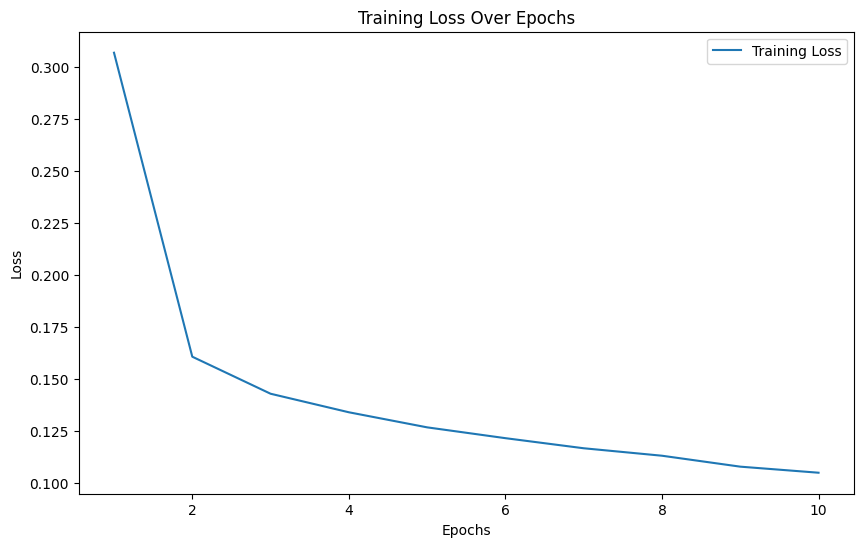

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save_pretrained("my_t5_small_finetuned")
tokenizer.save_pretrained("my_t5_small_finetuned")

('my_t5_small_finetuned/tokenizer_config.json',
 'my_t5_small_finetuned/special_tokens_map.json',
 'my_t5_small_finetuned/spiece.model',
 'my_t5_small_finetuned/added_tokens.json')

In [ ]:
total_val_loss = 0
model.eval()

with torch.no_grad():
    for batch in torch.utils.data.DataLoader(val_dataset, batch_size=batch_size):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_val_loss += loss.item()

avg_val_loss = total_val_loss / len(val_dataset)
print(f"Average Validation Loss: {avg_val_loss}")

Average Validation Loss: 0.09477117264270782


In [ ]:
from datasets import load_metric
import torch

rouge = load_metric("rouge")

model.eval()
with torch.no_grad():
    for batch in torch.utils.data.DataLoader(val_dataset, batch_size=8):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=50)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

        rouge.add_batch(predictions=decoded_preds, references=decoded_labels)

result = rouge.compute()
print(result)


{'rouge1': AggregateScore(low=Score(precision=0.45037793199855647, recall=0.45796542658730205, fmeasure=0.44775525124321086), mid=Score(precision=0.4653173673548666, recall=0.4742075396825397, fmeasure=0.4623785898398144), high=Score(precision=0.4806775828338317, recall=0.4907152083333333, fmeasure=0.4782289298809653)), 'rouge2': AggregateScore(low=Score(precision=0.2045153634559882, recall=0.2079775595238093, fmeasure=0.20303814987064064), mid=Score(precision=0.22161872294372248, recall=0.2253908730158724, fmeasure=0.21943827013629696), high=Score(precision=0.24014579184704155, recall=0.24251563492063435, fmeasure=0.2370666009356147)), 'rougeL': AggregateScore(low=Score(precision=0.42556216720779166, recall=0.4344497519841263, fmeasure=0.4241161937239331), mid=Score(precision=0.44168902208902155, recall=0.44951210317460316, fmeasure=0.43880255738413787), high=Score(precision=0.45765889700577167, recall=0.465444126984127, fmeasure=0.4545557032898743)), 'rougeLsum': AggregateScore(low=S

In [ ]:
from datasets import load_metric
import torch

rouge = load_metric("rouge")

model.eval()
with torch.no_grad():
    for batch in torch.utils.data.DataLoader(test_dataset, batch_size=8):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=50)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

        rouge.add_batch(predictions=decoded_preds, references=decoded_labels)

result = rouge.compute()
print(result)

{'rouge1': AggregateScore(low=Score(precision=0.4464792433261179, recall=0.4548929563492063, fmeasure=0.44329790723982004), mid=Score(precision=0.4636568778443779, recall=0.4714442460317459, fmeasure=0.4602641857862651), high=Score(precision=0.4802570269314016, recall=0.4881078273809522, fmeasure=0.4759565108611089)), 'rouge2': AggregateScore(low=Score(precision=0.20747814123376573, recall=0.20789041666666636, fmeasure=0.20399408049058834), mid=Score(precision=0.22381210317460268, recall=0.22444920634920587, fmeasure=0.2198411505977685), high=Score(precision=0.24121823232323197, recall=0.2418626388888884, fmeasure=0.23701588574415788)), 'rougeL': AggregateScore(low=Score(precision=0.4276768247724496, recall=0.4346634821428565, fmeasure=0.42478785778957134), mid=Score(precision=0.44315449689199676, recall=0.44914543650793615, fmeasure=0.4391804436469119), high=Score(precision=0.45991929050116565, recall=0.4662318650793654, fmeasure=0.45534741691218716)), 'rougeLsum': AggregateScore(low=

In [ ]:
model.eval()
with torch.no_grad():
    for batch in torch.utils.data.DataLoader(test_dataset, batch_size=8):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=50)

        decoded_inputs = tokenizer.batch_decode(input_ids, skip_special_tokens=True)
        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

        for input_text, pred, actual in zip(decoded_inputs, decoded_preds, decoded_labels):
            print(f"Input Text: {input_text}\n")
            print(f"Generated Summary: {pred}\n")
            print(f"Actual Summary: {actual}\n")
            print("--------------------------------------------------\n")


        break

Input Text: summarize: army awarded million dollars unk contracts build joint military bases bulgaria embassy said statement thursday

Generated Summary: unk contracts build joint military bases bulgaria

Actual Summary: army builds bulgarian base

--------------------------------------------------

Input Text: summarize: prominent militant group oil rich southern nigeria sunday said declared oil war threatened international industry vessels approach region

Generated Summary: militant group says war threatens international industry

Actual Summary: militant group niger delta declares war oil industry

--------------------------------------------------

Input Text: summarize: defense secretary robert gates arrived london wednesday ahead meeting nato colleagues set overshadowed georgia conflict russia

Generated Summary: gates arrives london ahead nato meeting russia

Actual Summary: gates arrives london ahead nato meeting

--------------------------------------------------

Input Text:

In [ ]:
from transformers import T5ForConditionalGeneration

model = T5ForConditionalGeneration.from_pretrained("t5-small")

n_last_layers = 3

#Freeze all layers first
for param in model.parameters():
    param.requires_grad = False

#Unfreeze the last 'n' layers
for i in range(-1, -n_last_layers - 1, -1):
    for param in model.decoder.block[i].parameters():
        param.requires_grad = True


In [ ]:
import matplotlib.pyplot as plt
model = T5ForConditionalGeneration.from_pretrained("t5-small")


train_losses = []

for param in model.parameters():
    param.requires_grad = False

n_last_layers = 3
for i in range(-1, -n_last_layers - 1, -1):
    for param in model.decoder.block[i].parameters():
        param.requires_grad = True

model.to(device)

epochs = 10
batch_size = 8
learning_rate = 3e-5

optimizer = AdamW(model.parameters(), lr=learning_rate)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataset) * epochs)

model.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in torch.utils.data.DataLoader(train_dataset, batch_size=batch_size):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_dataset)
    train_losses.append(avg_loss)
    print(f"Epoch: {epoch}, Loss: {avg_loss}")

Epoch: 0, Loss: 0.5988938335418701
Epoch: 1, Loss: 0.2811576003551483
Epoch: 2, Loss: 0.2207222473144531
Epoch: 3, Loss: 0.18867239792346954
Epoch: 4, Loss: 0.17400601000785829
Epoch: 5, Loss: 0.16589739496707917
Epoch: 6, Loss: 0.15913574297428132
Epoch: 7, Loss: 0.15502073652744294
Epoch: 8, Loss: 0.15138334543704987
Epoch: 9, Loss: 0.1483106059074402


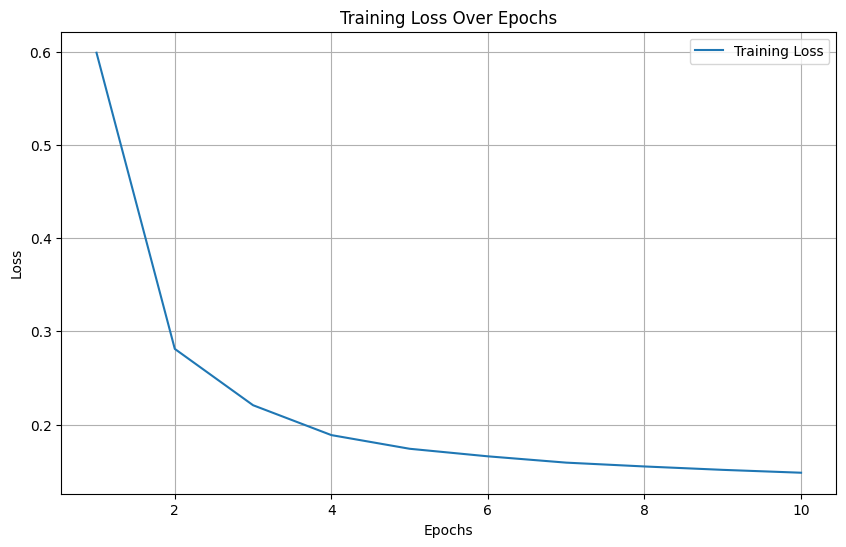

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
total_val_loss = 0
model.eval()

with torch.no_grad():
    for batch in torch.utils.data.DataLoader(val_dataset, batch_size=batch_size):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_val_loss += loss.item()

avg_val_loss = total_val_loss / len(val_dataset)
print(f"Average Validation Loss: {avg_val_loss}")

Average Validation Loss: 0.12440380144119263


In [ ]:
from datasets import load_metric

rouge = load_metric('rouge')

model.eval()

predictions = []
labels = []

with torch.no_grad():
    for batch in torch.utils.data.DataLoader(val_dataset, batch_size=batch_size):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels_batch = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels_batch, skip_special_tokens=True)

        predictions.extend(decoded_preds)
        labels.extend(decoded_labels)

for prediction, label in zip(predictions, labels):
    rouge.add(prediction=prediction, reference=label)

result = rouge.compute()
print(result)

{'rouge1': AggregateScore(low=Score(precision=0.37412513236763234, recall=0.3897264484126987, fmeasure=0.3733568350852804), mid=Score(precision=0.3884812236374736, recall=0.40445039682539663, fmeasure=0.3868713838406188), high=Score(precision=0.40290360982767204, recall=0.4193368452380951, fmeasure=0.40105226179737175)), 'rouge2': AggregateScore(low=Score(precision=0.13802015061327577, recall=0.14600534722222233, fmeasure=0.1379834595388277), mid=Score(precision=0.15082296176046184, recall=0.15962023809523818, fmeasure=0.15080573613263287), high=Score(precision=0.16400451839826857, recall=0.17345854166666638, fmeasure=0.16435658579745893)), 'rougeL': AggregateScore(low=Score(precision=0.3500738037656785, recall=0.36395118055555575, fmeasure=0.34909131618295774), mid=Score(precision=0.36461305569430535, recall=0.3798444444444444, fmeasure=0.3636611821614928), high=Score(precision=0.3793883706571207, recall=0.39496665674603165, fmeasure=0.37782516219698004)), 'rougeLsum': AggregateScore(

In [ ]:
from datasets import load_metric

rouge = load_metric('rouge')

model.eval()

predictions = []
labels = []

with torch.no_grad():
    for batch in torch.utils.data.DataLoader(test_dataset, batch_size=batch_size):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels_batch = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask)

        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels_batch, skip_special_tokens=True)

        predictions.extend(decoded_preds)
        labels.extend(decoded_labels)

for prediction, label in zip(predictions, labels):
    rouge.add(prediction=prediction, reference=label)

result = rouge.compute()
print(result)

{'rouge1': AggregateScore(low=Score(precision=0.37028295926295907, recall=0.38245105158730136, fmeasure=0.36753142536170463), mid=Score(precision=0.3855153846153842, recall=0.39845853174603196, fmeasure=0.38215816334937946), high=Score(precision=0.399534511391387, recall=0.41295982142857085, fmeasure=0.3956335357124399)), 'rouge2': AggregateScore(low=Score(precision=0.13718946879509383, recall=0.14525419642857154, fmeasure=0.13635825241579919), mid=Score(precision=0.14995227272727268, recall=0.15791666666666676, fmeasure=0.14853307000447136), high=Score(precision=0.16405048069985553, recall=0.17291797619047589, fmeasure=0.16182849719058928)), 'rougeL': AggregateScore(low=Score(precision=0.3490362882256631, recall=0.3599209623015868, fmeasure=0.34566012150474323), mid=Score(precision=0.36352022838272824, recall=0.3752773809523808, fmeasure=0.36006703856858735), high=Score(precision=0.37704770125707593, recall=0.3899941765873015, fmeasure=0.37330322031619206)), 'rougeLsum': AggregateScor

In [ ]:
model.eval()
with torch.no_grad():
    for batch in torch.utils.data.DataLoader(test_dataset, batch_size=8):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=50)

        decoded_inputs = tokenizer.batch_decode(input_ids, skip_special_tokens=True)
        decoded_preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)


        for input_text, pred, actual in zip(decoded_inputs, decoded_preds, decoded_labels):
            print(f"Input Text: {input_text}\n")
            print(f"Generated Summary: {pred}\n")
            print(f"Actual Summary: {actual}\n")
            print("--------------------------------------------------\n")

        break

Input Text: summarize: army awarded million dollars unk contracts build joint military bases bulgaria embassy said statement thursday

Generated Summary: unk contracts build joint military bases

Actual Summary: army builds bulgarian base

--------------------------------------------------

Input Text: summarize: prominent militant group oil rich southern nigeria sunday said declared oil war threatened international industry vessels approach region

Generated Summary: militant group warns oil war threatens region

Actual Summary: militant group niger delta declares war oil industry

--------------------------------------------------

Input Text: summarize: defense secretary robert gates arrived london wednesday ahead meeting nato colleagues set overshadowed georgia conflict russia

Generated Summary: gates meets nato colleagues russian conflict

Actual Summary: gates arrives london ahead nato meeting

--------------------------------------------------

Input Text: summarize: dell expec